In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Coefficient_uv_fun(G, u, v):
    union_uv = len(set(G[u]) | set(G[v]))   #union of points u and v
    if union_uv != 0:
        return len(list(nx.common_neighbors(G, u, v))) / union_uv
    else:
        return 0

In [3]:
def Coefficient_G_fun(G):
    cg = 0
    for edge in list(G.edges()):
        u, v = edge 
        cg = cg + Coefficient_uv_fun(G, u, v)
    if len(G.edges())!=0:
        return cg / len(G.edges())
    else:
        return 0

In [4]:
p = np.linspace(0,1,21)
print(p)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [5]:
G_sequence=[]
for i in range(len(p)):
    G_sequence.append(nx.erdos_renyi_graph(300, p[i]))
    
cG_sequence=[]
for i in range(len(G_sequence)):
    cG_sequence.append(Coefficient_G_fun(G_sequence[i]))

# The expectation for the common neighbors of point n and point v can be expressed as p^2(n-2), and for the union of point n and point v, the expectation of the points they own is added to the intersection ( is equal to p(1-p)(n-2)).

In [16]:
def theoretical_estimate(n,p):
    if p != 0: 
        return (p**2 *(n-2)) / (p*(2-p)*(n-2) + 2)
    else:
        return 0

list=[]
for i in range(len(p)):
    list.append(theoretical_estimate(300, p[i]))

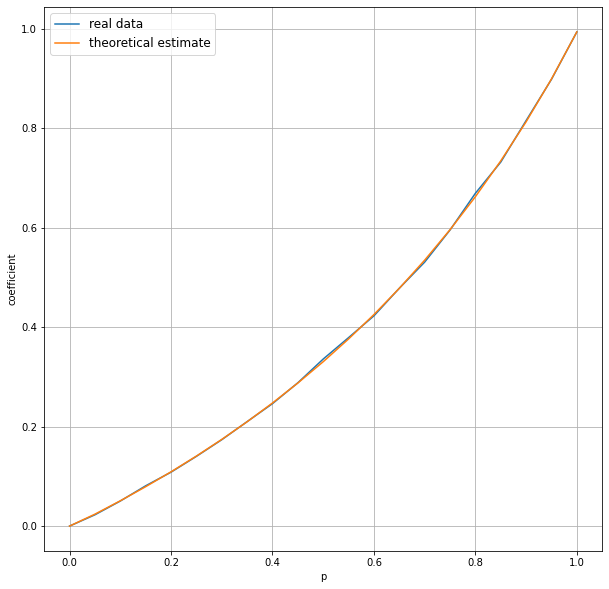

In [17]:
plt.figure(figsize=(10,10))
plt.plot(p,cG_sequence, label = "real data")
plt.plot(p,list, label = "theoretical estimate")
plt.xlabel("p")
plt.ylabel("coefficient")
plt.legend(fontsize = 'large')
plt.grid()
plt.show()